In [ ]:
!pip uninstall -y numpy pmdarima scipy cython
!pip install numpy==1.23.5 scipy cython
!pip install pmdarima

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scipy 1.14.1
Uninstalling scipy-1.14.1:
  Successfully uninstalled scipy-1.14.1
Found existing installation: Cython 3.0.12
Uninstalling Cython-3.0.12:
  Successfully uninstalled Cython-3.0.12
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17.1/17.1 MB 60.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37.6/37.6 MB 16.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.6/3.6 MB 60.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does 

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.2/2.2 MB 35.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Cargar el archivo Excel
file_path = '/content/Sales_Data.xlsx'
df = pd.read_excel(file_path)

# Mostrar las primeras filas
df.head()

Order Date      Sales
0 2015-01-01  14205.707
1 2015-02-01   4519.892
2 2015-03-01  55205.797
3 2015-04-01  27906.855
4 2015-05-01  23644.303

In [ ]:
# Nos aseguramos de que las fechas est√©n en el formato correcto
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Establecer la fecha como √≠ndice
df.set_index('Order Date', inplace=True)

# Revisar los datos
df.head()

Sales
Order Date           
2015-01-01  14205.707
2015-02-01   4519.892
2015-03-01  55205.797
2015-04-01  27906.855
2015-05-01  23644.303

# Visualizacion Inicial

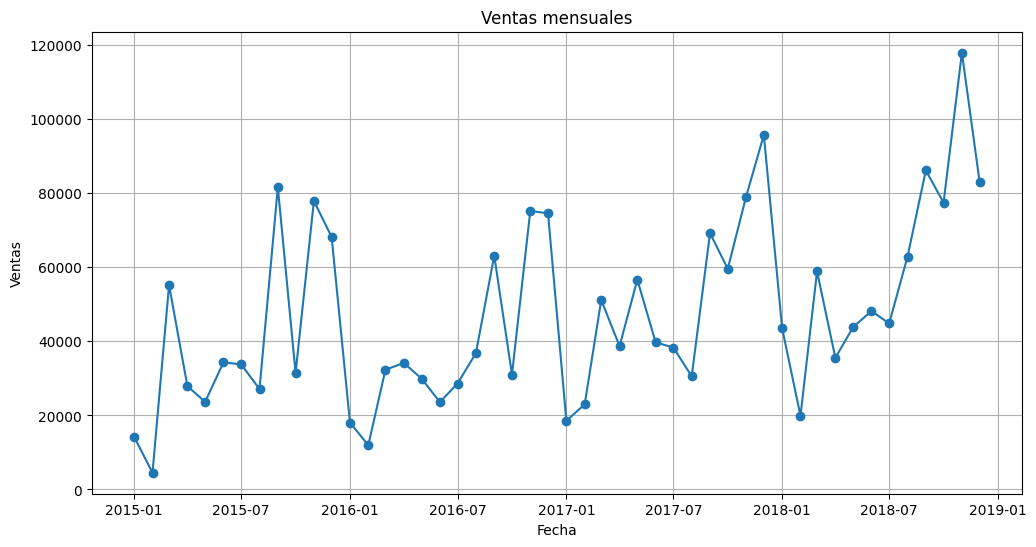

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], marker='o')
plt.title('Ventas mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

# Descompopsicion de la serie

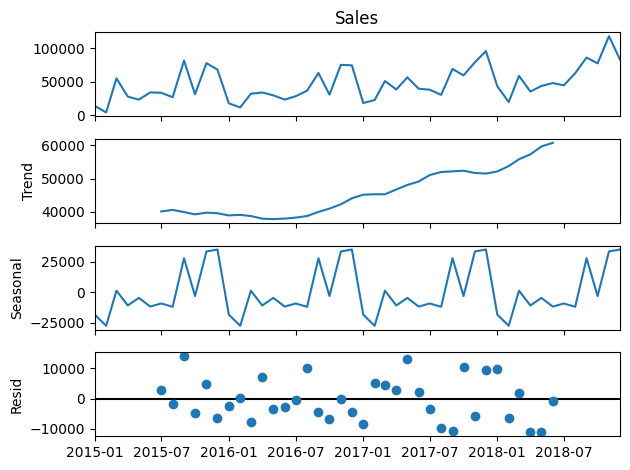

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie: additive o multiplicative
decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)
decomposition.plot()
plt.show()

# Verificar estacionariedad (Dickey-Fuller)

In [ ]:
result = adfuller(df['Sales'])
print(f'Statistic: {result[0]}')
print(f'p-value: {result[1]}')


Statistic: -4.416136761430769
p-value: 0.00027791039276670623


la serie es estacionaria porque el p < 0.05

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Prueba de Dickey-Fuller a la serie original
adf_result = adfuller(df['Sales'])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] < 0.05:
    print("‚úÖ La serie es estacionaria (no se necesita diferenciaci√≥n, d=0)")
else:
    print("‚ö†Ô∏è La serie NO es estacionaria (posiblemente se necesita diferenciaci√≥n, d=1)")


ADF Statistic: -4.416136761430769
p-value: 0.00027791039276670623
‚úÖ La serie es estacionaria (no se necesita diferenciaci√≥n, d=0)


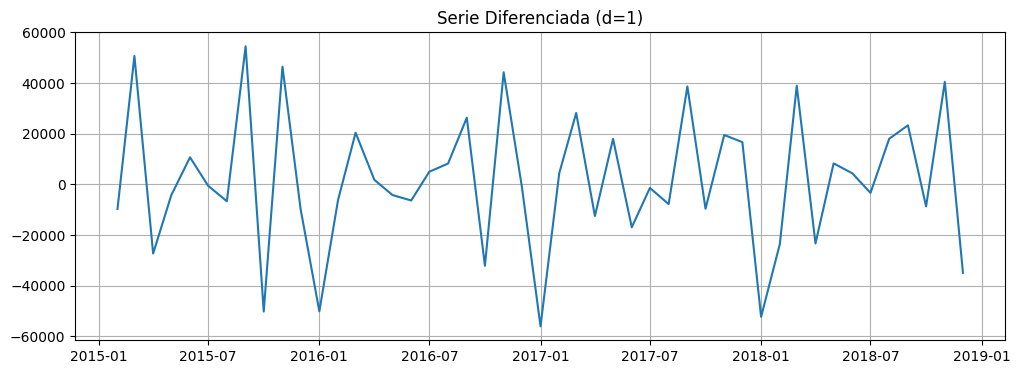

ADF tras diferenciaci√≥n: -8.727061830353259
p-value: 3.2669175472798525e-14


In [ ]:
# Aplicar primera diferenciaci√≥n
df_diff = df['Sales'].diff().dropna()

# Graficar la serie diferenciada
plt.figure(figsize=(12, 4))
plt.plot(df_diff)
plt.title('Serie Diferenciada (d=1)')
plt.grid(True)
plt.show()

# Verificamos si ahora es estacionaria
result_diff = adfuller(df_diff)
print("ADF tras diferenciaci√≥n:", result_diff[0])
print("p-value:", result_diff[1])


# Identificaci√≥n de p y q con ACF y PACF

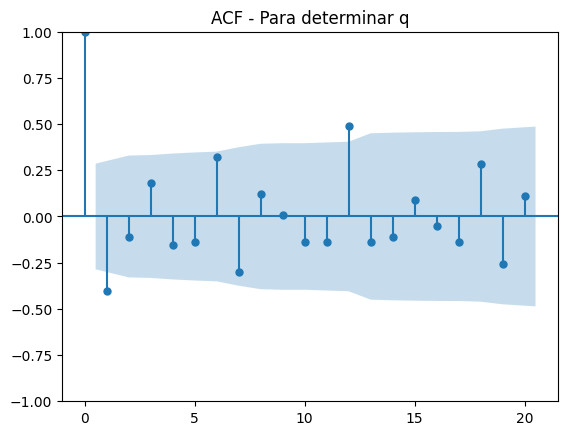

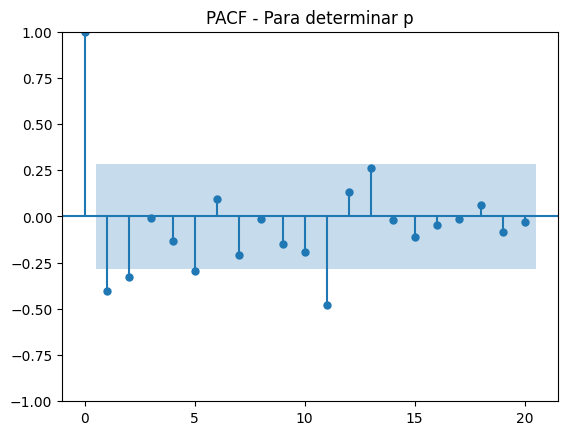

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF (para identificar q)
plot_acf(df_diff, lags=20)
plt.title("ACF - Para determinar q")
plt.show()

# PACF (para identificar p)
plot_pacf(df_diff, lags=20, method='ywm')  # m√©todo robusto
plt.title("PACF - Para determinar p")
plt.show()

Esto sugiere que el componente de media m√≥vil (MA) se comporta bien con q = 2, porque:

Hay dos lags significativos (lag 1 y lag 2)

A partir del lag 3, ya no hay correlaci√≥n fuerte

para el modelo PACF indica que el componente autorregresivo (AR) podr√≠a tener p = 3, porque los primeros tres lags (1, 2, 3) son significativos a partir del lag 4, ya no hay autocorrelaci√≥n parcial fuerte:

p = 3 (por PACF)

q = 2 (por ACF)

d = 1 (porque la serie necesit√≥ una diferenciaci√≥n para volverse estacionaria seg√∫n Dickey-Fuller)





In [ ]:
order = (3, 1, 2)
# Entrenamos el modelo ARIMA con los par√°metros (p=3, d=1, q=2)

# Modelo ARIMA con p=3, d=1, q=2
model = ARIMA(df['Sales'], order=(3, 1, 2))
model_fitted = model.fit()

# Resumen del modelo
model_fitted.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -538.753
Date:                Wed, 16 Apr 2025   AIC                           1089.506
Time:                        15:23:16   BIC                           1100.607
Sample:                    01-01-2015   HQIC                          1093.684
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0487      1.888     -0.026      0.979      -3.749       3.651
ar.L2          0.1482      0.481      0.308      0.758      -0.794       1.090
ar.L3          0.1654      0.372      0.444      0.657      -0.564       0.895
ma.L1         -0.5538      1.941     -0.285      0.775      -4.359       3.251
ma.L2         -0.2902      1.401     -0.207      0.836      -3.036       2.456
sigma2      5.035e+08   1.15e-08   4.36e+16      0.000    5.03e+08    5.03e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.73   Prob(JB):                         0.72
Heteroskedasticity (H):               1.00   Skew:                             0.24
Prob(H) (two-sided):                  1.00   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.47e+33. Standard errors may be unstable.
"""

Par√°metros AR (Autoregressive):

ùëé
ùëü
.
ùêø
1
ar.L1: -0.0487

ùëé
ùëü
.
ùêø
2
ar.L2: 0.1482

ùëé
ùëü
.
ùêø
3
ar.L3: 0.1654

Estos son los coeficientes para los t√©rminos autoregresivos (AR) del modelo. Las pruebas de hip√≥tesis (valor p) sugieren que ninguno de los t√©rminos autoregresivos es estad√≠sticamente significativo, dado que sus valores p son grandes.

Par√°metros MA (Moving Average):

ùëö
ùëé
.
ùêø
1
ma.L1: -0.5538

ùëö
ùëé
.
ùêø
2
ma.L2: -0.2902

Al igual que los t√©rminos AR, los coeficientes para los t√©rminos de media m√≥vil (MA) no son significativos, con valores p altos.

Sigma¬≤: 5.035e+08 es la varianza residual, que mide la dispersi√≥n de los residuos (errores) del modelo.

Estad√≠sticas adicionales:

Log-Likelihood: -538.753, que es una medida de la bondad del ajuste del modelo.

AIC (Criterio de Informaci√≥n de Akaike): 1089.506

BIC (Criterio de Informaci√≥n Bayesiano): 1100.607

HQIC (Criterio de Informaci√≥n Hannan-Quinn): 1093.684

Prueba de Ljung-Box: El valor
ùëù
p de la prueba es 0.73, lo que sugiere que no hay autocorrelaci√≥n significativa en los residuos del modelo.

Prueba de Jarque-Bera: El valor
ùëù
p es 0.72, lo que indica que los residuos del modelo siguen una distribuci√≥n normal (no se rechaza la hip√≥tesis nula de normalidad).

Heteroskedasticidad (H): Un valor de 1.00 para la prueba de heteroskedasticidad sugiere que no hay evidencia de heteroskedasticidad en los residuos.

Interpretaci√≥n:
El modelo ARIMA(3,1,2) ajustado no presenta t√©rminos autoregresivos ni de media m√≥vil significativos.

La prueba de Ljung-Box muestra que no hay autocorrelaci√≥n significativa en los residuos, lo que es una se√±al positiva.

El valor de AIC y BIC sugiere que el modelo no es el mejor ajuste, por lo que podr√≠a ser √∫til probar otros valores de
ùëù
p,
ùëë
d, y
ùëû
q.



# Predicciones

In [ ]:

# Ajustar el modelo ARIMA con los par√°metros (p=3, d=1, q=2)
model = ARIMA(df['Sales'], order=(3, 1, 2))

# Ajustar el modelo a los datos
fitted_model = model.fit()

# Ver los resultados del modelo
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -538.753
Date:                Wed, 16 Apr 2025   AIC                           1089.506
Time:                        15:36:32   BIC                           1100.607
Sample:                    01-01-2015   HQIC                          1093.684
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0487      1.888     -0.026      0.979      -3.749       3.651
ar.L2          0.1482      0.481      0.308      0.758      -0.794       1.090
ar.L3          0.1654      0.372      0.444      0.6

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

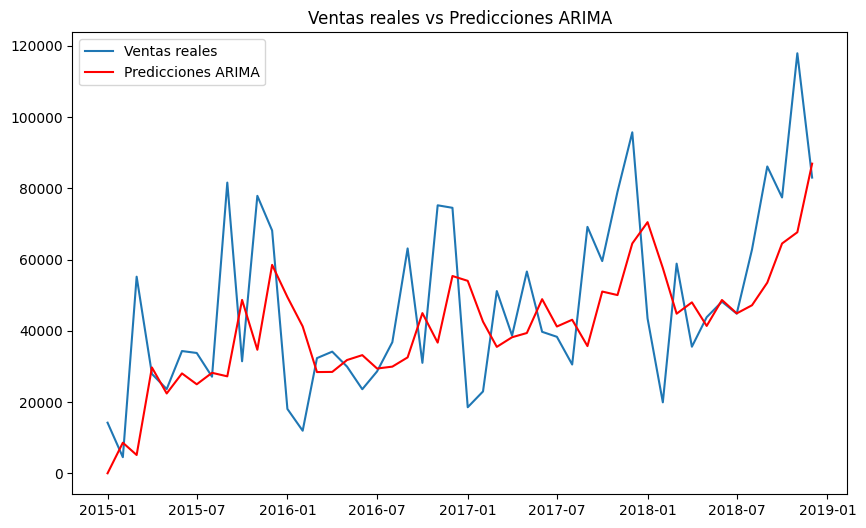

In [ ]:
# Predicciones para el conjunto de entrenamiento
train_pred = fitted_model.predict(start=0, end=len(df)-1, typ='levels')

# Graficar las predicciones vs. los valores reales
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Sales'], label='Ventas reales')
plt.plot(df.index, train_pred, label='Predicciones ARIMA', color='red')
plt.title('Ventas reales vs Predicciones ARIMA')
plt.legend()
plt.show()

Ventas Reales: La l√≠nea azul representa las ventas reales,  a lo largo del tiempo muestra c√≥mo se comportaron las ventas mensuales del conjunto de datos original.

Predicciones ARIMA: La l√≠nea roja muestra las predicciones generadas por el modelo ARIMA en el conjunto de datos de entrenamiento. Estas predicciones deber√≠an seguir de cerca el comportamiento de las ventas reales, ya que el modelo fue entrenado con estos datos.
En terminos generales el modelo ARIMA est√° ajustando bien los datos hist√≥ricos y es capaz de capturar la tendencia de las ventas pasadas.

# Predicciones para los pr√≥ximos meses

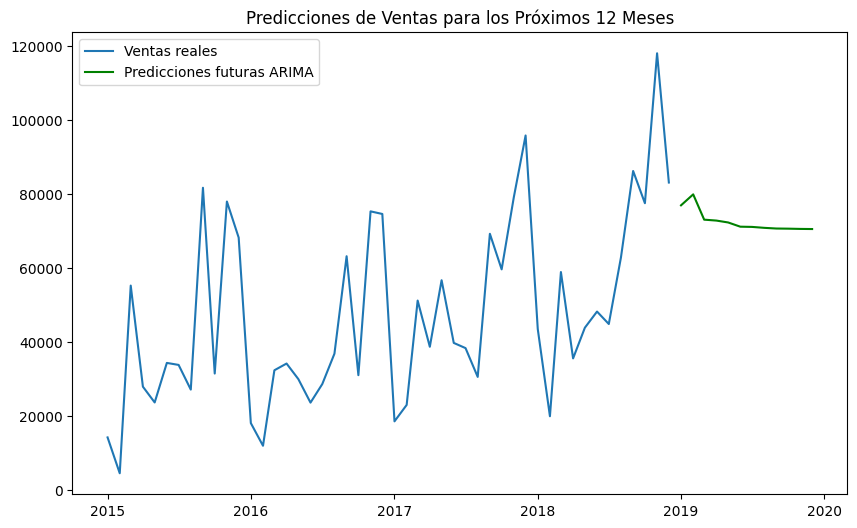

In [ ]:
# Realizar predicciones para los pr√≥ximos 12 meses (esto depende de la frecuencia de los datos)
forecast_steps = 12
forecast = fitted_model.forecast(steps=forecast_steps)

# Crear un rango de fechas para las predicciones
forecast_dates = pd.date_range(df.index[-1], periods=forecast_steps+1, freq='MS')[1:]

# Graficar las predicciones futuras
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Sales'], label='Ventas reales')
plt.plot(forecast_dates, forecast, label='Predicciones futuras ARIMA', color='green')
plt.title(f'Predicciones de Ventas para los Pr√≥ximos {forecast_steps} Meses')
plt.legend()
plt.show()

Aqu√≠ estamos prediciendo las ventas para los pr√≥ximos 12 meses. La l√≠nea verde muestra las proyecciones futuras de ventas seg√∫n el modelo ARIMA. Podemos observar que las predicciones se desv√≠an mucho o no tienen sentido, puede ser una se√±al de que el modelo ARIMA no est√° considerando adecuadamente alg√∫n factor relevante en los datos, como variaciones estacionales o eventos extraordinarios

# Dividir los datos en conjunto de entrenamiento y prueba

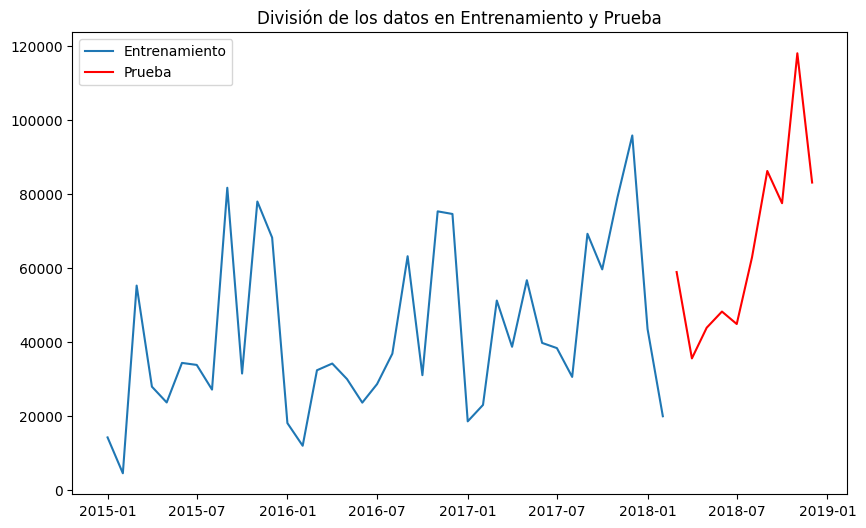

In [ ]:
# Dividir los datos en entrenamiento y prueba
train_size = int(len(df) * 0.8)  # 80% para entrenamiento
train, test = df[:train_size], df[train_size:]

# Visualizaci√≥n para asegurarnos que la divisi√≥n es correcta
plt.figure(figsize=(10,6))
plt.plot(train.index, train['Sales'], label='Entrenamiento')
plt.plot(test.index, test['Sales'], label='Prueba', color='red')
plt.title('Divisi√≥n de los datos en Entrenamiento y Prueba')
plt.legend()
plt.show()

# Ajustar el modelo ARIMA con los datos de entrenamiento

In [ ]:
# Ajustar el modelo ARIMA en los datos de entrenamiento
from statsmodels.tsa.arima.model import ARIMA

# Usar los par√°metros ARIMA(3, 1, 2) que ya hemos identificado
model = ARIMA(train['Sales'], order=(3, 1, 2))
fitted_model = model.fit()

# Resumen del modelo ajustado
print(fitted_model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   38
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -424.607
Date:                Wed, 16 Apr 2025   AIC                            861.213
Time:                        15:45:59   BIC                            870.879
Sample:                    01-01-2015   HQIC                           864.621
                         - 02-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0733      3.260     -0.022      0.982      -6.462       6.315
ar.L2          0.0554      0.822      0.067      0.946      -1.556       1.667
ar.L3          0.0737      0.403      0.183      0.8

# Realizar predicciones sobre el conjunto de prueba

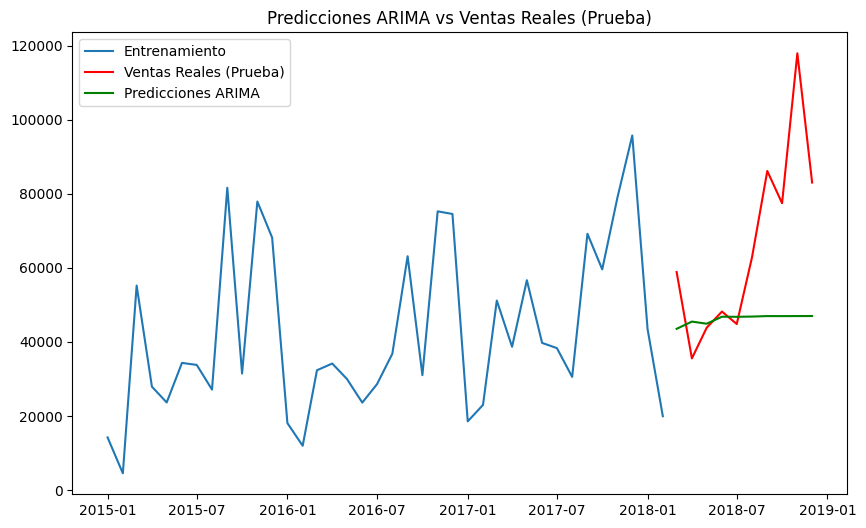

In [ ]:
# Realizar las predicciones en el conjunto de prueba
predictions = fitted_model.forecast(steps=len(test))

# Crear un DataFrame con las predicciones y los valores reales para comparar
comparison_df = pd.DataFrame({
    'Fecha': test.index,
    'Ventas Reales': test['Sales'],
    'Predicciones': predictions
})

# Visualizaci√≥n de las predicciones contra los valores reales
plt.figure(figsize=(10,6))
plt.plot(train.index, train['Sales'], label='Entrenamiento')
plt.plot(test.index, test['Sales'], label='Ventas Reales (Prueba)', color='red')
plt.plot(test.index, predictions, label='Predicciones ARIMA', color='green')
plt.title('Predicciones ARIMA vs Ventas Reales (Prueba)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular el MSE y MAE
mse = mean_squared_error(test['Sales'], predictions)
mae = mean_absolute_error(test['Sales'], predictions)

print(f"Error Cuadr√°tico Medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")

Error Cuadr√°tico Medio (MSE): 939690234.8782618
Error Absoluto Medio (MAE): 22237.98631399782


El MAE proporciona una interpretaci√≥n directa del tama√±o del error en t√©rminos de las unidades de ventas. Un valor de 22,237.99 puede ser relativamente grande o peque√±o dependiendo del volumen de las ventas, pero es una m√©trica √∫til para medir la precisi√≥n del modelo.

El MSE refleja que el modelo tiene algunos errores relativamente grandes (debido a su naturaleza de penalizar m√°s los errores grandes), lo que podr√≠a indicar que hay algunas predicciones muy incorrectas que influyen en la media.